In [73]:
#importing all modules and packages used

import petroeval as pet
import lasio as las
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lasio
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn import preprocessing
import lightgbm as lgb
import catboost as cat

%matplotlib inline

In [2]:

def log_plot1(logs):
    #logs = logs.sort_values(by='index')
    top = logs.index.min()
    bot = logs.index.max()
    
    f, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,8))
    ax[0].plot(logs.DT, logs.index, color='red')
    ax[1].plot(logs.GR, logs.index, color='black')
    ax[2].plot(logs.NPHI, logs.index, color='blue')
    ax[3].plot(logs.RHOB, logs.index, color='c')
    ax[4].plot(logs.RT, logs.index, color='m')
    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("DT (us/ft)")
    ax[0].set_xlim(logs.DT.min(), logs.DT.max())
    ax[0].set_ylabel("Depth(ft)")
    ax[1].set_xlabel("GR (API)")
    ax[1].set_xlim(logs.GR.min(), logs.GR.max())
    ax[2].set_xlabel("NPHI (v/v)")
    ax[2].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[3].set_xlabel("RHOB (g/cm3)")
    ax[3].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[4].set_xlabel("RT (ohm.m)")
    ax[4].set_xscale("log")
    ax[4].set_xlim(-2,logs.RT.max())
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]);
    ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[4].set_yticklabels([]) 
    
    f.suptitle('Well: 15-9-F-11', fontsize=14,y=0.94)

# EXPLORATORY DATA ANALYSIS

In [3]:
F1 = pet.read_lasio('./15_9-F-1/WLC_PETRO_COMPUTED_INPUT_1.LAS')
F11A = pet.read_lasio('./15_9-F-11 A/WLC_PETRO_COMPUTED_INPUT_1.LAS')
F11B = pet.read_lasio('./15_9-F-11 B/WLC_PETRO_COMPUTED_INPUT_1.LAS')
F11T2 = pet.read_lasio('./15_9-F-11 T2/WLC_PETRO_COMPUTED_INPUT_1.LAS')
F12 = pet.read_lasio('./15_9-F-12/WLC_PETRO_COMPUTED_INPUT_1.LAS')
F15D = pet.read_lasio('./15_9-F-15 D/WLC_PETRO_COMPUTED_INPUT_1.LAS')

F1, F11A, F11B, F11T2, F12, F15D

Header section Parameter regexp=~P was not found.


(<lasio.las.LASFile at 0x7f4629894fd0>,
 <lasio.las.LASFile at 0x7f4629838550>)

In [4]:
F1 = F1.df()
F1.head()

,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
DEPTH,,,,,,,,,,,,,,,,,,,,
145.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.1,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.2,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.3,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
F11A = F11A.df()
F11A.head()

,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,...,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
DEPTH,,,,,,,,,,,,,,,,,,,,,
188.5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188.6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,3.801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188.7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188.8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
F11B = F11B.df()
F11B.head()

,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
DEPTH,,,,,,,,,,,,,,,,,,,
188.5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,4.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188.6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,3.801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188.7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,4.301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188.8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,4.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,4.599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
F11T2 = F11T2.df()
F11T2.head()

,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,...,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
DEPTH,,,,,,,,,,,,,,,,,,,,,
188.5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188.6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188.7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188.8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
F12 = F12.df()
F12.head()

,CARB_FLAG,COAL_FLAG,DT,GR,NPHI,RD,RHOB,ROP5_RM,RS,RT,SAND_FLAG
DEPTH,,,,,,,,,,,
239.8776,NaN,NaN,NaN,NaN,NaN,0.7766,NaN,98.863197,4.490900,0.1015,NaN
240.0300,NaN,NaN,NaN,NaN,NaN,0.7717,NaN,98.687103,6.752500,0.1000,NaN
240.1824,NaN,NaN,NaN,NaN,NaN,0.7717,NaN,99.039299,6.752500,0.1000,NaN
240.3348,NaN,NaN,NaN,20.866899,NaN,0.4374,NaN,99.760498,12.005200,0.1000,NaN
240.4872,NaN,NaN,NaN,20.984800,NaN,2.3402,NaN,99.748299,139.059204,0.1000,NaN


In [9]:
F15D = F15D.df()
F15D.head()

,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,GR,NBGRCFM,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
DEPTH,,,,,,,,,,,,,,,,,,,,
145.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.1,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.2,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.3,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
F1.shape, F11A.shape, F11B.shape, F11T2.shape, F12.shape, F15D.shape

((34861, 20), (35735, 21), (45818, 19), (43733, 21), (25899, 11), (45391, 20))

In [11]:
logs_list = [F1, F11A, F11B, F11T2, F12, F15D]

In [12]:
for log in logs_list:
    print(f'-------------_______-----------------------------------------____________------------')
    print(log.isna().sum())

-------------_______-----------------------------------------____________------------
ABDCQF01    25185
ABDCQF02    25185
ABDCQF03    25185
ABDCQF04    25185
BS              0
CALI        24726
DRHO        24719
DT          25039
GR            692
NPHI        24843
PEF         24392
RACEHM       1051
RACELM       1051
RD           1152
RHOB        24815
RM           1152
ROP           806
RPCEHM       1051
RPCELM       1051
RT           1051
dtype: int64
-------------_______-----------------------------------------____________------------
ABDCQF01    23267
ABDCQF02    23402
ABDCQF03    23839
ABDCQF04    23410
BS              0
CALI        24054
DRHO        24047
DT          24260
DTS         24651
GR            144
NPHI        24138
PEF         24110
RACEHM      23857
RACELM      23857
RD            570
RHOB        24110
RM            570
ROP           386
RPCEHM      23909
RPCELM      23891
RT            570
dtype: int64
-------------_______-----------------------------------------___

In [13]:
for log in logs_list:
    print(f'-------------_______-----------------------------------------____________------------')
    print(log.describe())

-------------_______-----------------------------------------____________------------
          ABDCQF01     ABDCQF02     ABDCQF03     ABDCQF04            BS  \
count  9676.000000  9676.000000  9676.000000  9676.000000  34861.000000   
mean      2.486954     2.490317     2.492418     2.489801     18.021957   
std       0.131763     0.133055     0.134572     0.133050      7.407961   
min       1.689400     1.711800     1.818800     1.744000      8.500000   
25%       2.442400     2.447375     2.449450     2.444700      8.500000   
50%       2.535150     2.539150     2.541400     2.538400     17.500000   
75%       2.576000     2.581625     2.584300     2.581525     26.000000   
max       2.924100     2.751100     2.862200     2.919000     36.000000   

               CALI          DRHO           DT            GR          NPHI  \
count  10135.000000  10142.000000  9822.000000  34169.000000  10018.000000   
mean       8.588488      0.051502    77.410579     58.717495      0.169421   
std 

           ABDCQF01      ABDCQF02      ABDCQF03      ABDCQF04            BS  \
count  19369.000000  19369.000000  19369.000000  19369.000000  43733.000000   
mean       2.495900      2.502245      2.502557      2.498966     15.740470   
std        0.128024      0.130497      0.131405      0.128957      7.373113   
min        1.921000      1.961000      2.067000      2.074000      8.500000   
25%        2.459000      2.468000      2.467000      2.464000      8.500000   
50%        2.529000      2.535000      2.536000      2.532000     17.500000   
75%        2.583000      2.590000      2.591000      2.585000     26.000000   
max        3.022000      3.026000      3.042000      3.142000     36.000000   

               CALI          DRHO            DT           DTS            GR  \
count  19677.000000  19683.000000  19465.000000  18721.000000  43566.000000   
mean       8.684985      0.059024     75.507783    138.132721     48.779702   
std        0.060765      0.010430     14.913084    

# Data Prepration and Visualization

The missing values were cut off from each well to focus on the availaable region since that is what will be used in preparing the training datasets

In [14]:
F1.tail()

,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
DEPTH,,,,,,,,,,,,,,,,,,,,
3631.5,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0631,NaN,NaN,NaN
3631.6,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0356,NaN,NaN,NaN
3631.7,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0080,NaN,NaN,NaN
3631.8,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.9805,NaN,NaN,NaN
3631.9,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0032,NaN,NaN,NaN


In [12]:
f1 = pd.DataFrame()
f1['DT'] = F1.DT
f1['GR'] = F1.GR
f1['NPHI'] = F1.NPHI
f1['RHOB'] = F1.RHOB
f1['RT'] = F1.RT
f1.index = F1.index

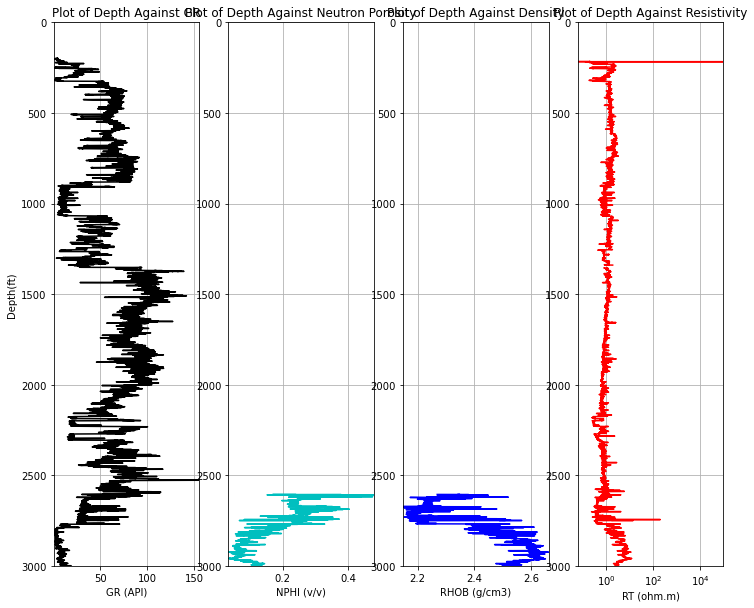

In [13]:
pet.log_plot(f1, top=0, base=3000)

In [14]:
f11A = pd.DataFrame()
f11A['DT'] = F11A.DT
f11A['GR'] = F11A.GR
f11A['NPHI'] = F11A.NPHI
f11A['RHOB'] = F11A.RHOB
f11A['RT'] = F11A.RT
f11A.index = F11A.index

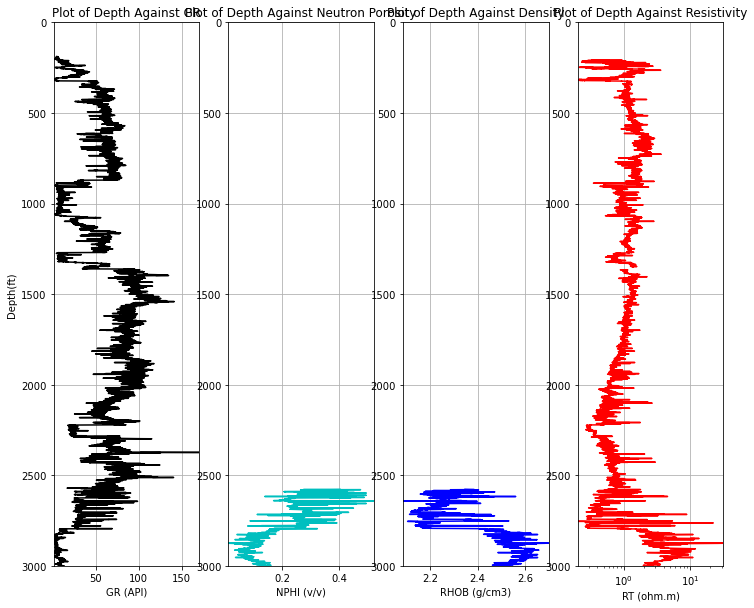

In [15]:
pet.log_plot(f11A, top=0, base=3000)

In [16]:
f11B = pd.DataFrame()
#f11B['DT'] = F11B.DT
f11B['GR'] = F11B.GR
f11B['NPHI'] = F11B.NPHI
f11B['RHOB'] = F11B.RHOB
f11B['RT'] = F11B.RT
f11B.index = F11B.index

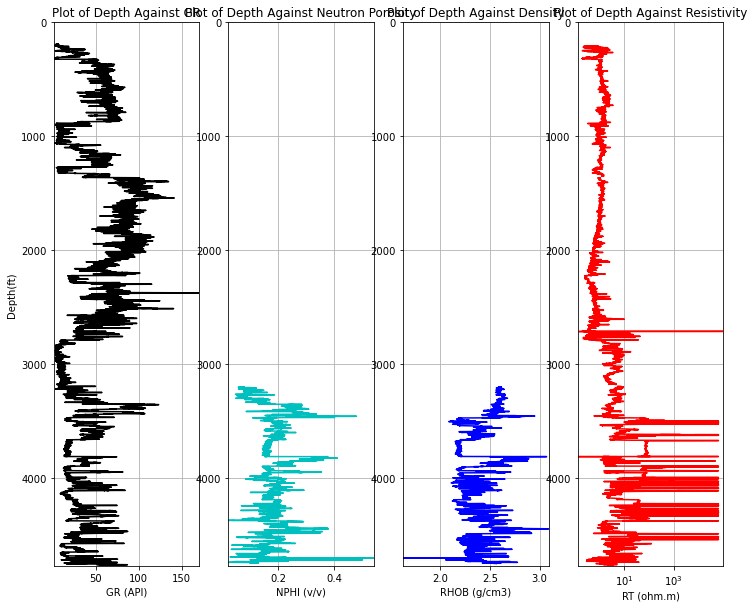

In [17]:
pet.log_plot(F11B, 0, 4770)

In [21]:
f15D.tail()

,GR,NPHI,RHOB,RT,DEPTH
DEPTH,,,,,
4684.5,NaN,NaN,NaN,NaN,4684.5
4684.6,NaN,NaN,NaN,NaN,4684.6
4684.7,NaN,NaN,NaN,NaN,4684.7
4684.8,NaN,NaN,NaN,NaN,4684.8
4684.9,NaN,NaN,NaN,NaN,4684.9


In [22]:
f11T2 = pd.DataFrame()
f11T2['DT'] = F11T2.DT
f11T2['GR'] = F11T2.GR
f11T2['NPHI'] = F11T2.NPHI
f11T2['RHOB'] = F11T2.RHOB
f11T2['RT'] = F11T2.RT
f11T2.index = F11T2.index

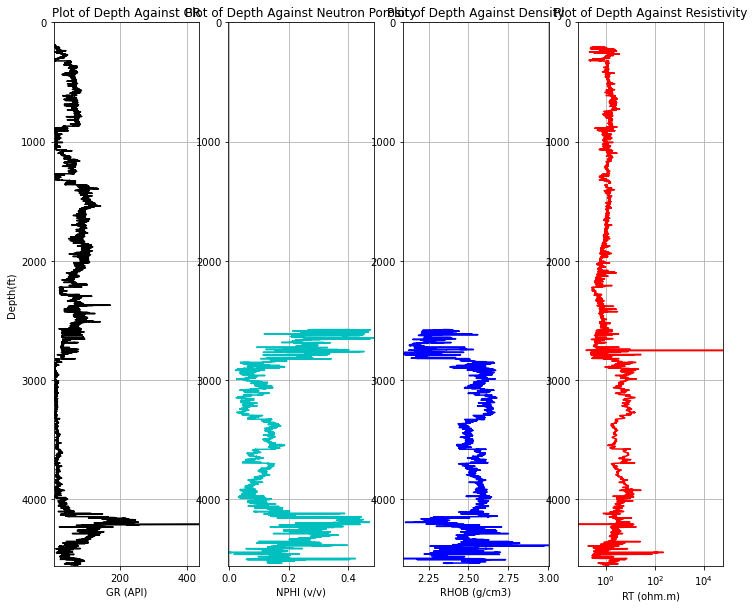

In [23]:
pet.log_plot(f11T2, 0, 4561)

In [24]:
f12 = pd.DataFrame()
f12['DT'] = F12.DT
f12['GR'] = F12.GR
f12['NPHI'] = F12.NPHI
f12['RHOB'] = F12.RHOB
f12['RT'] = F12.RT
f12.index = F12.index

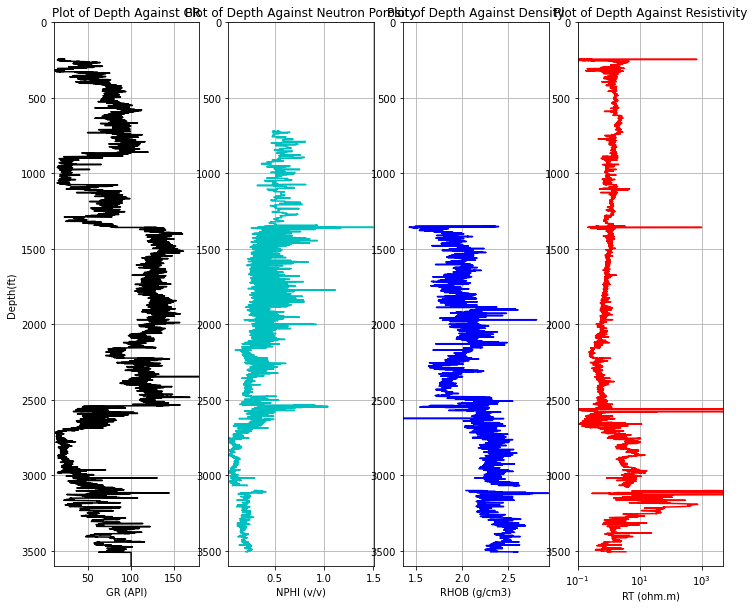

In [25]:
pet.log_plot(f12, 0, 3600)

In [26]:
f15D = pd.DataFrame()
#f15D['DT'] = F15D.DT
f15D['GR'] = F15D.GR
f15D['NPHI'] = F15D.NPHI
f15D['RHOB'] = F15D.RHOB
f15D['RT'] = F15D.RT
f15D.index = F15D.index

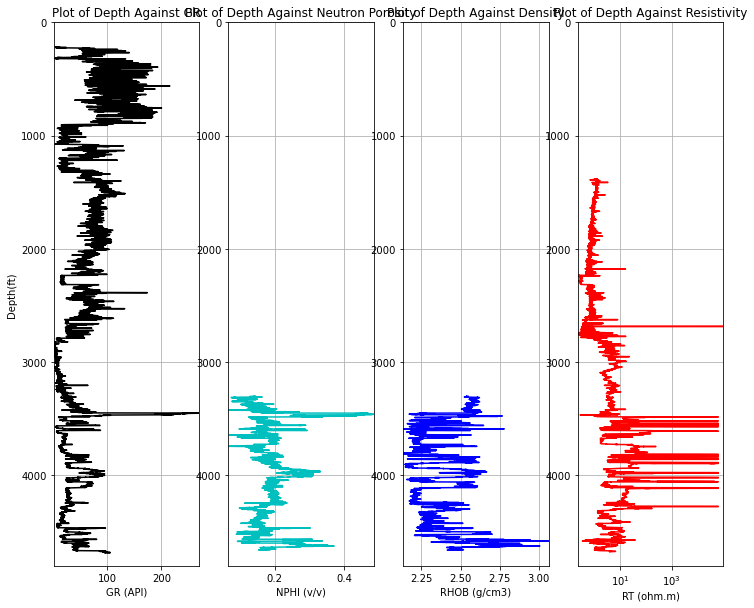

In [27]:
pet.log_plot(f15D, 0, 4800)

In [28]:
f1_edited = f1.dropna()
f1_edited.tail()

,DT,GR,NPHI,RHOB,RT,DEPTH
DEPTH,,,,,,
3598.5,76.6795,90.2940,0.1634,2.5984,2.1991,3598.5
3598.6,76.3281,85.8942,0.1686,2.5997,2.2756,3598.6
3598.7,76.0730,83.1276,0.1811,2.5998,2.3320,3598.7
3598.8,75.9054,81.5331,0.1977,2.5984,2.3674,3598.8
3598.9,75.9105,83.8768,0.2117,2.5959,2.2720,3598.9


/home/olawale/anaconda3/lib/python3.7/site-packages/petroeval/plots.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['DEPTH'] = logs.index


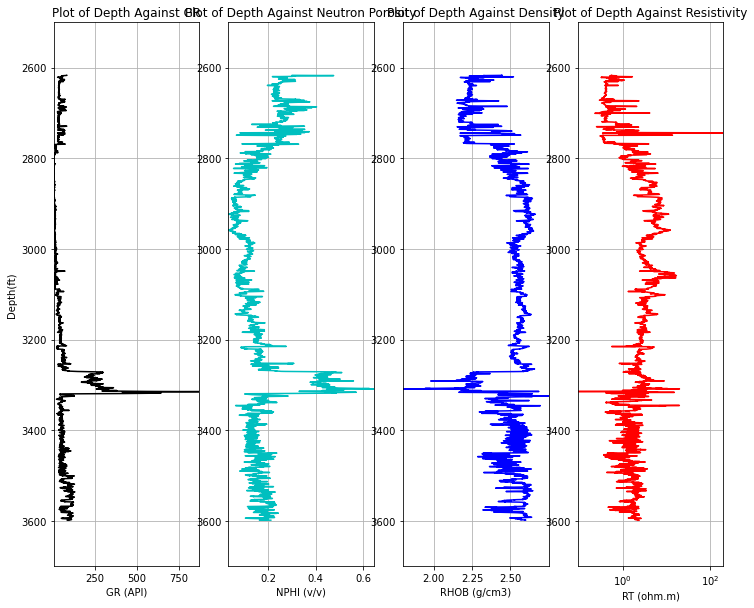

In [29]:
pet.log_plot(f1_edited, 2500, 3700)

In [30]:
f11A_edited = f11A.dropna()
f11A_edited.tail()

,DT,GR,NPHI,RHOB,RT,DEPTH
DEPTH,,,,,,
3722.9,83.399,68.077,0.188,2.438,0.982,3722.9
3723.0,83.763,68.856,0.182,2.434,1.020,3723.0
3723.1,84.560,70.850,0.182,2.432,1.054,3723.1
3723.2,84.867,69.909,0.184,2.431,1.045,3723.2
3723.3,84.934,68.948,0.187,2.434,1.014,3723.3


/home/olawale/anaconda3/lib/python3.7/site-packages/petroeval/plots.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['DEPTH'] = logs.index


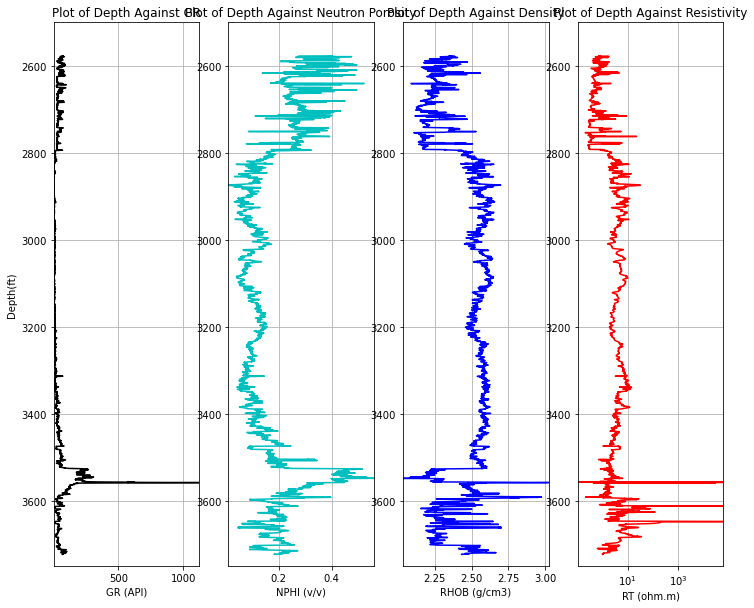

In [33]:
pet.log_plot(f11A_edited, 2500, 3750)

In [34]:
f11B_edited = f11B.dropna()
f11B_edited.tail()

,GR,NPHI,RHOB,RT
DEPTH,,,,
4744.3,16.249,0.115,2.447,1.809
4744.4,18.881,0.118,2.446,1.487
4744.5,20.047,0.121,2.441,1.208
4744.6,22.520,0.120,2.438,1.137
4744.7,25.265,0.125,2.440,1.093


/home/olawale/anaconda3/lib/python3.7/site-packages/petroeval/plots.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['DEPTH'] = logs.index


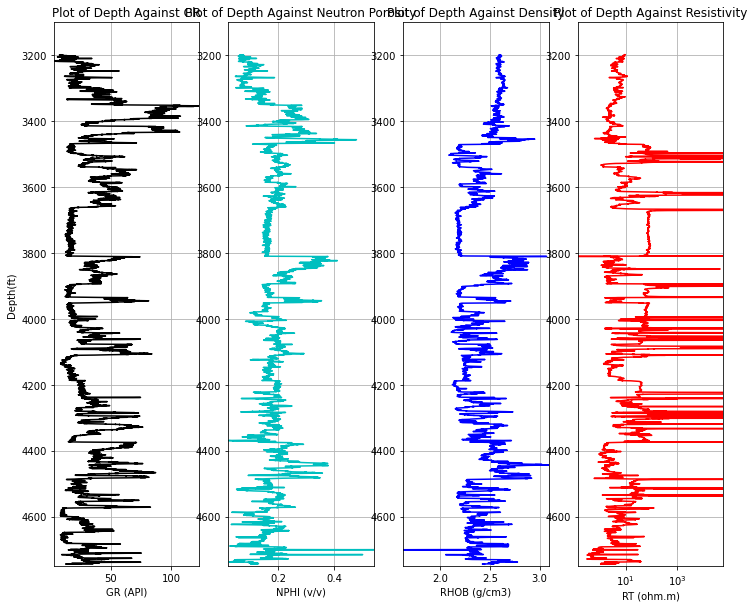

In [37]:
pet.log_plot(f11B_edited, 3100, 4750)

In [38]:
f11T2_edited = f11T2.dropna()
f11T2_edited.tail()

,DT,GR,NPHI,RHOB,RT,DEPTH
DEPTH,,,,,,
4521.9,73.536,83.937,0.185,2.461,1.863,4521.9
4522.0,71.441,85.725,0.181,2.459,1.834,4522.0
4522.1,69.882,86.486,0.174,2.458,1.812,4522.1
4522.2,68.713,83.485,0.162,2.458,1.869,4522.2
4522.3,68.127,81.584,0.149,2.464,2.020,4522.3


/home/olawale/anaconda3/lib/python3.7/site-packages/petroeval/plots.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['DEPTH'] = logs.index


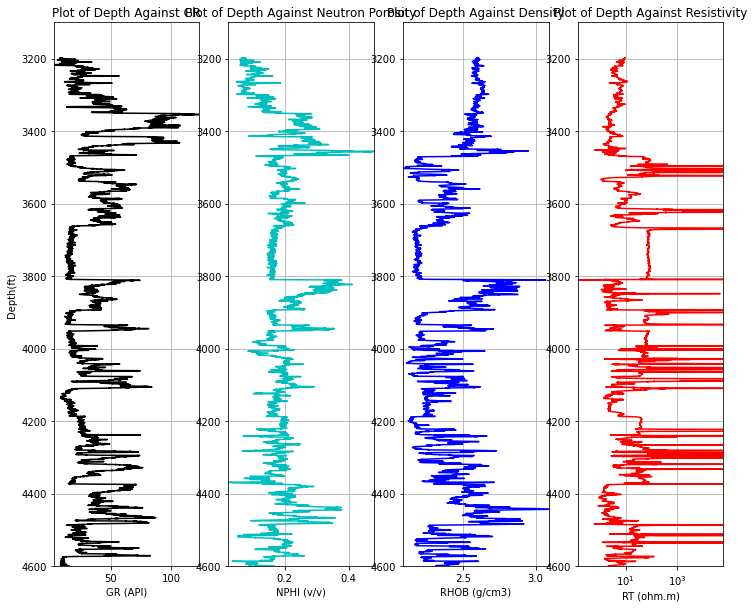

In [39]:
pet.log_plot(f11B_edited, 3100, 4600)

In [50]:
f12_edited = f12.dropna()
f12_edited.tail()

,DT,GR,NPHI,RHOB,RT,DEPTH
DEPTH,,,,,,
3441.9540,86.421097,69.547798,0.2125,2.3700,0.7082,3441.9540
3442.1064,91.530403,68.673103,0.2099,2.3679,0.7164,3442.1064
3442.2588,81.688400,68.032997,0.2090,2.3648,0.7255,3442.2588
3442.4112,78.252502,67.392998,0.2081,2.3618,0.7347,3442.4112
3442.5636,78.339203,66.768097,0.2074,2.3613,0.7514,3442.5636


/home/olawale/anaconda3/lib/python3.7/site-packages/petroeval/plots.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['DEPTH'] = logs.index


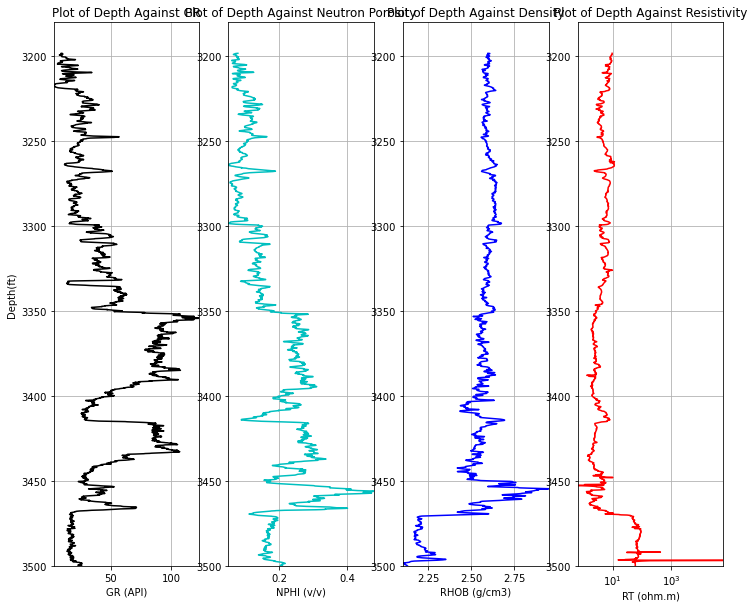

In [43]:
pet.log_plot(f11B_edited, 3180, 3500)

In [44]:
f15D_edited = f15D.dropna()
f15D_edited.tail()

,GR,NPHI,RHOB,RT,DEPTH
DEPTH,,,,,
4658.0,43.0931,0.1573,2.4374,1.0742,4658.0
4658.1,43.2569,0.1560,2.4381,1.0781,4658.1
4658.2,43.8828,0.1550,2.4381,1.0860,4658.2
4658.3,44.1790,0.1551,2.4374,1.0930,4658.3
4658.4,43.5732,0.1556,2.4353,1.0909,4658.4


/home/olawale/anaconda3/lib/python3.7/site-packages/petroeval/plots.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['DEPTH'] = logs.index


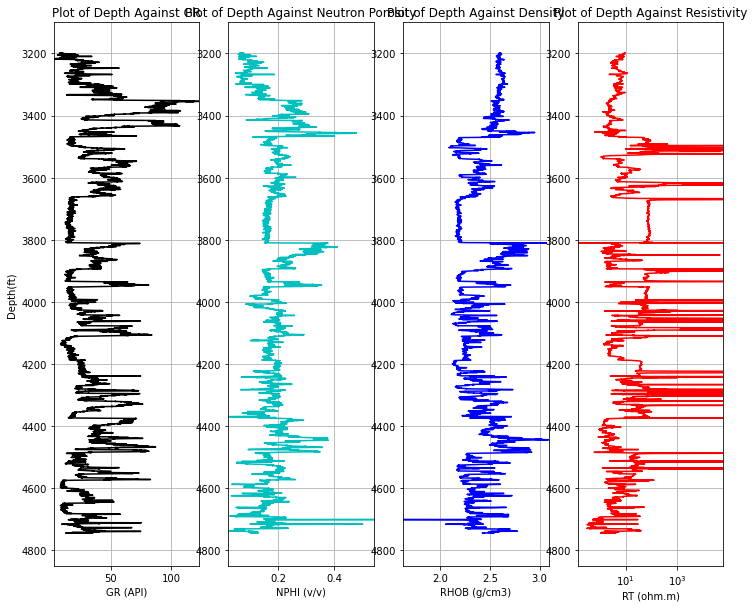

In [48]:
pet.log_plot(f11B_edited, 3100, 4850)

In [52]:
f1_edited.to_csv('f1_edited.csv')   #train & validation
f15D_edited.to_csv('f15D_edited.csv')   #test
f11B_edited.to_csv('f11B_edited.csv')   #test
f11A_edited.to_csv('f11A_edited.csv')    #train & validation
f11T2_edited.to_csv('f11T2_edited.csv')    #train & validation
f12_edited.to_csv('f12_edited.csv')     #train & validation

In [55]:
f1_edited = pd.read_csv('f1_edited.csv')
f15D_edited = pd.read_csv('f15D_edited.csv')
f11B_edited = pd.read_csv('f11B_edited.csv')
f11A_edited = pd.read_csv('f11A_edited.csv')
f11T2_edited = pd.read_csv('f11T2_edited.csv')
f12_edited = pd.read_csv('f12_edited.csv')

In [56]:
f1 = f1_edited
f15 = f15D_edited
f11b = f11B_edited
f11a = f11A_edited
f11t2 = f11T2_edited
f12 = f12_edited

# Creating Train, Test and Validation Datasets

Training Dataset while f1 is used for validation

In [59]:
f1_valid = pd.concat((f11a, f11t2, f12)).reset_index(drop=True)
f11a_valid = pd.concat((f1, f11t2, f12)).reset_index(drop=True)
f11t2_valid = pd.concat((f11a, f1, f12)).reset_index(drop=True)
f12_valid = pd.concat((f11a, f11t2, f1)).reset_index(drop=True)

In [60]:
f1_valid.shape, f11a_valid.shape, f11t2_valid.shape, f12_valid.shape

((43757, 7), (42115, 7), (34146, 7), (40719, 7))

In [61]:
f1.head()

,DEPTH,DT,GR,NPHI,RHOB,RT,DEPTH.1
0,2616.8,99.8262,79.8456,0.3023,2.4445,0.5524,2616.8
1,2616.9,99.9305,79.6564,0.3483,2.4468,0.5399,2616.9
2,2617.0,100.1234,78.1091,0.4028,2.4213,0.5376,2617.0
3,2617.1,100.2931,76.7843,0.4428,2.3815,0.5353,2617.1
4,2617.2,100.3768,73.6875,0.4643,2.3464,0.5362,2617.2


In [62]:
f11a.head()

,DEPTH,DT,GR,NPHI,RHOB,RT,DEPTH.1
0,2577.0,109.385,74.697,0.403,2.347,0.751,2577.0
1,2577.1,110.132,72.797,0.399,2.357,0.798,2577.1
2,2577.2,110.843,71.629,0.390,2.360,0.750,2577.2
3,2577.3,111.010,69.899,0.385,2.361,0.719,2577.3
4,2577.4,110.797,69.041,0.382,2.363,0.693,2577.4


In [63]:
f11t2.head()

,DEPTH,DT,GR,NPHI,RHOB,RT,DEPTH.1
0,2577.0,109.385,74.700,0.403,2.347,0.751,2577.0
1,2577.1,110.133,72.799,0.399,2.357,0.798,2577.1
2,2577.2,110.843,71.631,0.390,2.360,0.750,2577.2
3,2577.3,111.010,69.900,0.385,2.361,0.719,2577.3
4,2577.4,110.797,69.040,0.382,2.363,0.693,2577.4


In [64]:
f12.head()

,DEPTH,DT,GR,NPHI,RHOB,RT,DEPTH.1
0,1368.7044,152.749801,120.349998,0.4487,1.7212,1.1466,1368.7044
1,1368.8568,151.107299,122.358100,0.4236,1.7273,1.1124,1368.8568
2,1369.0092,153.146392,119.607200,0.3936,1.7256,1.0262,1369.0092
3,1369.1616,151.787597,122.000503,0.4558,1.7412,0.9215,1369.1616
4,1369.3140,150.264892,121.560302,0.4363,1.7538,0.8959,1369.3140


# Training and Validation

Training and validation using wel F1

In [70]:
#label = f1_valid['DT']
#train = f1_valid.drop('DT', axis=1)

x_train, x_test, y_train, y_test = ms.train_test_split(train, label, 
                                                       test_size=0.25,
                                                       random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(32817, 6) (32817,)
(10940, 6) (10940,)


In [71]:
f1_dt = f1['DT']
test = f1.drop('DT', axis=1)

In [69]:
#using StandardScaler function to scale the numeric features 

scaler = preprocessing.StandardScaler().fit(train)
train = scaler.transform(train)
train

array([[-0.74487208,  0.47173928,  1.66352157, -0.13301741, -0.03208664,
        -0.74487208],
       [-0.74473193,  0.43581246,  1.63176585, -0.09087318, -0.03204916,
        -0.74473193],
       [-0.74459178,  0.41372691,  1.56031548, -0.07822991, -0.03208744,
        -0.74459178],
       ...,
       [ 0.46779716,  0.34573062,  0.12336915, -0.05800081, -0.03210698,
         0.46779716],
       [ 0.46801075,  0.33362896,  0.11622412, -0.07064416, -0.03209964,
         0.46801075],
       [ 0.46822434,  0.3218128 ,  0.11066679, -0.07275121, -0.03208632,
         0.46822434]])

In [72]:

#using StandardScaler function to scale the numeric features 

scaler = preprocessing.StandardScaler().fit(test)
test = scaler.transform(test)
test

array([[-1.73187447,  0.47069633,  1.472726  , -0.26808512, -0.63516752,
        -1.73187447],
       [-1.73152178,  0.46784388,  1.97303061, -0.25115996, -0.63870448,
        -1.73152178],
       [-1.7311691 ,  0.44451626,  2.56578281, -0.43880844, -0.63935528,
        -1.7311691 ],
       ...,
       [ 1.7311691 ,  0.52017687,  0.15453211,  0.87473092, -0.13161691,
         1.7311691 ],
       [ 1.73152178,  0.49613765,  0.33507681,  0.86442865, -0.12160023,
         1.73152178],
       [ 1.73187447,  0.53147206,  0.48734343,  0.84603174, -0.14859435,
         1.73187447]])

In [ ]:
class Model():
    
    def __init__(self, model, train, test, label):
        
        
        self.train = train
        self.test = test
        self.label = label
        
    def __call__(self, plot = True):
        return self.fit(plot)
    
    def fit(self, plot):
        
        #SPLIT ONE

        self.x_train, self.x_test, self.y_train, self.y_test = ms.train_test_split(self.train, 
                                                                                   pd.DataFrame(np.array(self.label)), 
                                                                                   test_size=0.25,
                                                                                   random_state=42)

            #SPLIT TWO

        self.x_test1, self.x_test2, self.y_test1, self.y_test2 = ms.train_test_split(self.x_test,
                                                                                     self.y_test,
                                                                                     test_size=0.5,
                                                                                     random_state=42)

        rf = RandomForestClassifier(n_estimators=400, max_depth=8, max_features="auto",
                                    min_samples_split=2, min_samples_leaf=1, verbose=2)
        
        ext = ExtraTreesRegressor(n_estimators=600, max_depth=8, min_samples_split=2, 
                                   min_samples_leaf=1, max_features='auto')
        
        dtr = DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=1, 
                                    min_impurity_split=2)

        def show_evaluation(pred, true):

            print(f'RMSE: {mean_squared_error(true.values, pred)**0.5}')
            print(f'R1 Score is: {r2_score(true, pred)}')
            #print(f'F1 is: {f1_score(pred, true.values, average="weighted")}')
        
        n_split=5
        kf = KFold(n_splits=n_split, shuffle=False)
        
        if self.model == 'dtr':
            self.model = dtr
        elif self.model == 'ext':
            self.model = ext
        else:
            self.model = rf
        
        scores = []
        #TEST DATA
        pred_test = np.zeros((len(self.x_test1)))
        pred_val = np.zeros((len(self.x_test2)))
        open_test_pred = np.zeros((len(self.test)))
        
        (self.model).fit(self.x_train, self.y_train, early_stopping_rounds=100, eval_set=[(self.x_test1, self.y_test1)])
        #scores.append(metric(model.predict_proba(X_test),y_test))
        pred_test=(self.model).predict_proba(self.x_test1)
        pred_val=(self.model).predict_proba(self.x_test2)
        open_test_pred=(self.model).predict_proba(self.test)


        pred_test_avg = pd.DataFrame(pred_test/split)
        pred_val_avg = pd.DataFrame(pred_val/split)
        open_test_avg = pd.DataFrame(open_test_pred/split)

        test_result = np.array(pred_test_avg.idxmax(axis=1))
        val_result = np.array(pred_val_avg.idxmax(axis=1))
        open_result = np.array(open_test_avg.idxmax(axis=1))


        

        print('----------------TEST EVALUATION------------------')
        show_evaluation(test_result, self.y_test1)

        print('----------------HOLD OUT EVALUATION------------------')
        show_evaluation(val_result, self.y_test2)
                  
        if plot: self.plot_feat_imp(self.model)
        return open_result, self.model
              
              
    def plot_feat_imp(self, model):
        feat_imp = pd.Series(model.feature_importances_).sort_values(ascending=False)
        plt.figure(figsize=(12,8))
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')